# Homework #2 Part I

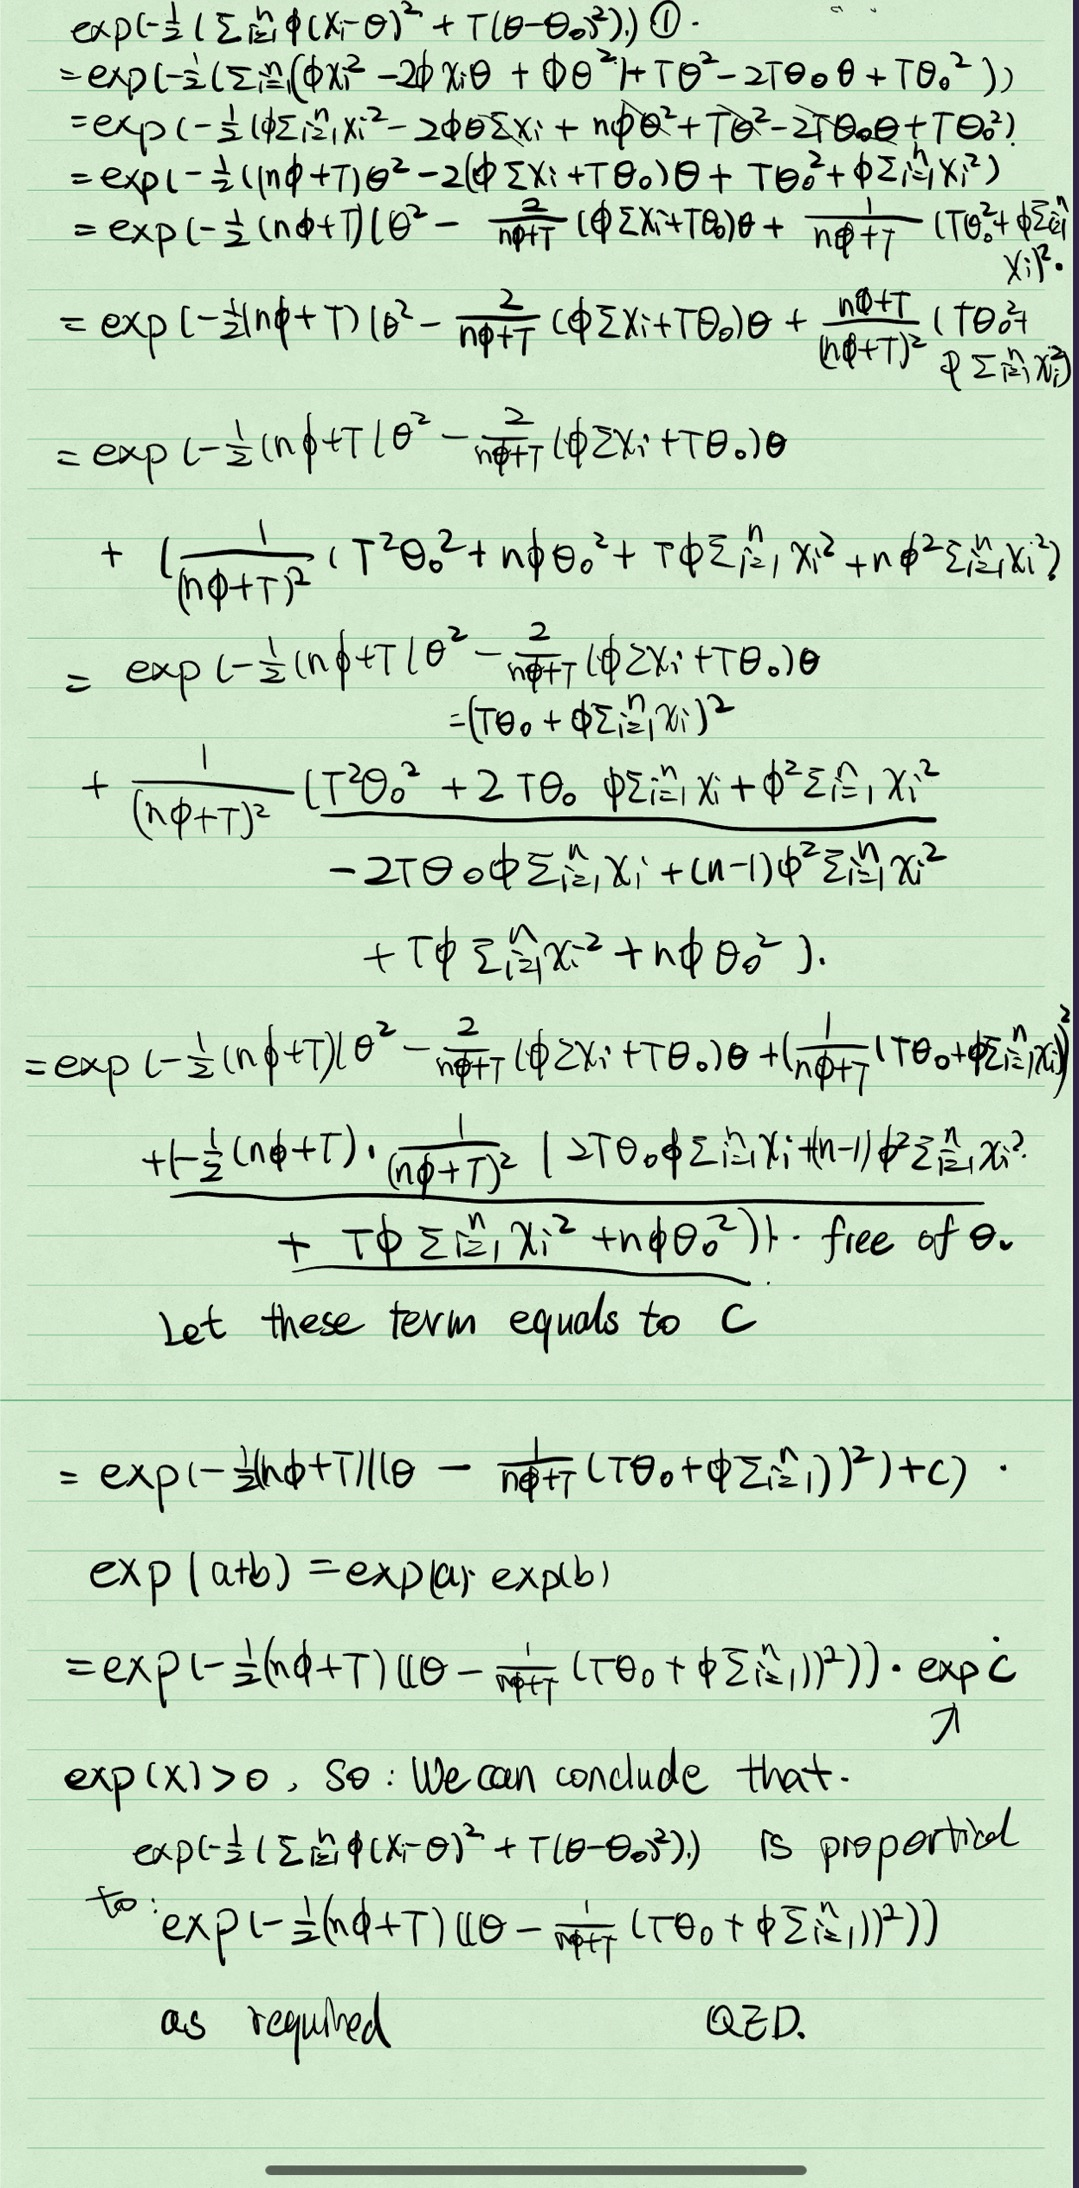

# Homework #2 Part II

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
Author: Hao Ni 1008283457
        Yuchen Hua 1008307921

## Problem 1

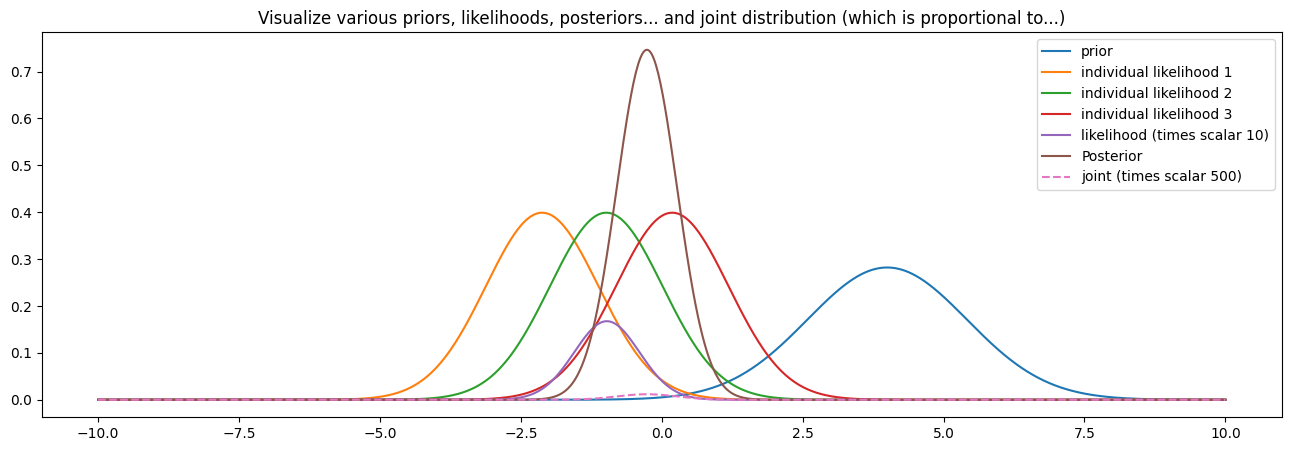

In [88]:
#HWK problem2-1

#number of samples
n = 3
#x is normal distribution numbers
x = stats.norm(loc=0,scale=1).rvs(n)
#prior distribution parameter
theta_0,tau = 4,1/2
#Domain of parameter
parameter_domain = np.linspace(-10,10,1001);

#calculate the likelihood function
likelihoods = [stats.norm.pdf(parameter_domain, loc=xi, scale=1) for xi in x]
likelihood = np.prod(likelihoods,axis=0)

#put the parameter domain
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
#add theta
c,c2 = 500,10; 
joint = c * likelihood*prior # elementwise multiplication 
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, prior, label="prior")
for i in range(n):
    plt.plot(parameter_domain, likelihoods[i], label= f"individual likelihood {i+1}")
plt.plot(parameter_domain, c2 * likelihood, label="likelihood (times scalar "+str(c2)+")")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend() 
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)"); 

## Problem 2

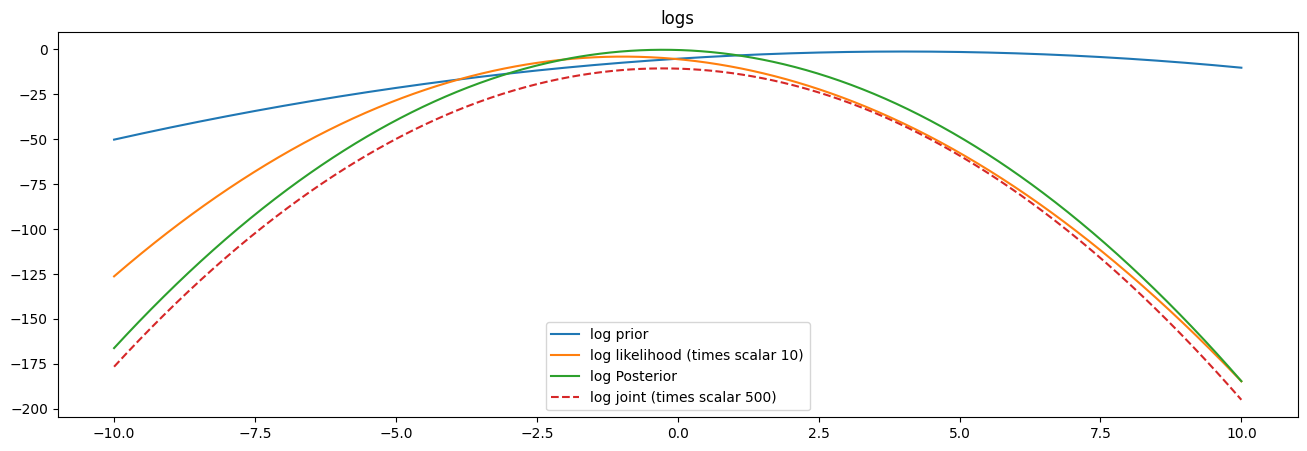

In [91]:
#HWK2-2

#calculate the likelihood function
log_likelihoods = [stats.norm.logpdf(parameter_domain, loc=xi, scale=1) for xi in x]
log_likelihood = np.sum(log_likelihoods,axis=0)

#put the parameter domain
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
joint = log_likelihood + prior 
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, prior, label="log prior")
# for i in range(n):
#     plt.plot(parameter_domain, log_likelihoods[i], label= f"log individual likelihood {i+1}")
plt.plot(parameter_domain, log_likelihood, label="log likelihood (times scalar "+str(c2)+")")
plt.plot(parameter_domain, posterior, label="log Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="log joint (times scalar "+str(c)+")")
plt.legend() 
plt.title("logs"); 

## Problem 3

The given scenario involves a normal likelihood function $p(x \mid \theta, \phi)$ with a uniform prior $p(\theta) \propto 1$. The resulting posterior distribution $p(\theta \mid x)$ is proportional to the likelihood function.

After simplifying and combining terms, the posterior distribution can be expressed as $p(\theta \mid x) \propto \exp\left(-\frac{\phi^2 n}{2} (\theta - \bar{x})^2\right)$. This leads to a posterior distribution for $\theta$ in the form of a normal distribution with a mean of $\bar{x}$ (the sample mean) and a variance of $\frac{\sigma^2}{n} $, where $\sigma^2$ represents the variance associated with the likelihood function, assuming $\phi = \frac{1}{\sigma^2}$.

In summary, the posterior distribution for $\theta$ given the provided conditions is $\theta \mid x \sim \mathcal{N}(\bar{x}, \frac{\sigma^2}{n})$.

## Problem 4

Log likelihoods, solely contingent on data and model parameters, remain impervious to the choice of prior, whether it be improper or otherwise. Posterior distributions, arising from the amalgamation of likelihood and prior, could potentially be improper with an improper prior; however, a sufficiently informative likelihood can supersede the impact of the improper prior, resulting in a proper posterior. Marginal likelihood constants, or evidence, play a pivotal role in normalizing the posterior for integration to one, particularly crucial when dealing with improper priors. An informative likelihood, when partnered with an improper prior, has the potential to yield a proper posterior, with the integral of the likelihood and prior product being finite and normalized by the marginal likelihood constant. Conversely, uninformative likelihoods pose a challenge, as their insufficient informativeness may render the product non-integrable, making the posterior improper regardless of the marginal likelihood constant. In summary, when employing improper priors, meticulous attention to the marginal likelihood is essential to ensure the resulting posterior constitutes a valid probability distribution, while the log likelihood remains constant, unaffected by the choice of prior.